This notebook is meant to show the tracing engine. It uses old COMPASS equilibrium module, which is meant to be replaced by Pleque. 

Basic imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
%matplotlib inline
plt.rcParams['figure.dpi'] = 200

Integration module with ODE integration functions.

In [2]:
from scipy import integrate

COMPASS EFIT equilibrium loading and processing module from `python-lib`

In [3]:
from equilibrium.efit import EfitEquilibrium

In [4]:
shot_no = 13925  # discharge number
time = 1160  # ms
efit = EfitEquilibrium(shot_no, time, revision=1)  # first revision

Optimization terminated successfully.
         Current function value: -0.004588
         Iterations: 12
         Function evaluations: 24
Optimization terminated successfully.
         Current function value: -0.004550
         Iterations: 10
         Function evaluations: 20


The chosen flux surface will be the surface with $\rho=0.95$

In [8]:
psi95 = efit.rho2psi(0.95)

The field line start start/intial condition of the integration is chosen on the outer midplane

In [11]:
y0 = [efit.psi2R_Z0(psi95), 0]  # [R, Z]

The pleque module holding field line tracing utilities

In [17]:
import pleque.utils.field_line_tracers as flt

Creates a function $$\frac{d\vec x}{d\phi} = f(\phi, \vec x)$$ where $\vec x = [R, Z]$ is the position in the poloidal cross-section plane and $\phi$ is the toroidal angle

In [19]:
dphi_func = flt.dhpi_tracer_factory(efit.B_R, efit.B_Z, efit.B_phi)

In [207]:
reload(flt)

<module 'pleque.utils.field_line_tracers' from '../pleque/utils/field_line_tracers.py'>

In [208]:
pol_stopper = poloidal_angle_stopper_factory(y0, [efit.R_mag_axis, efit.Z_mag_axis], -1)

In [209]:
    sol = integrate.solve_ivp(dphi_func, (0, 2*np.pi*7), y0,
                          events=pol_stopper,
                          max_step=1e-2,  # we want high phi resolution
                         )
sol.message, sol.nfev

('A termination event occurred.', 11486)

In [210]:
phi = sol.t
R, Z = sol.y

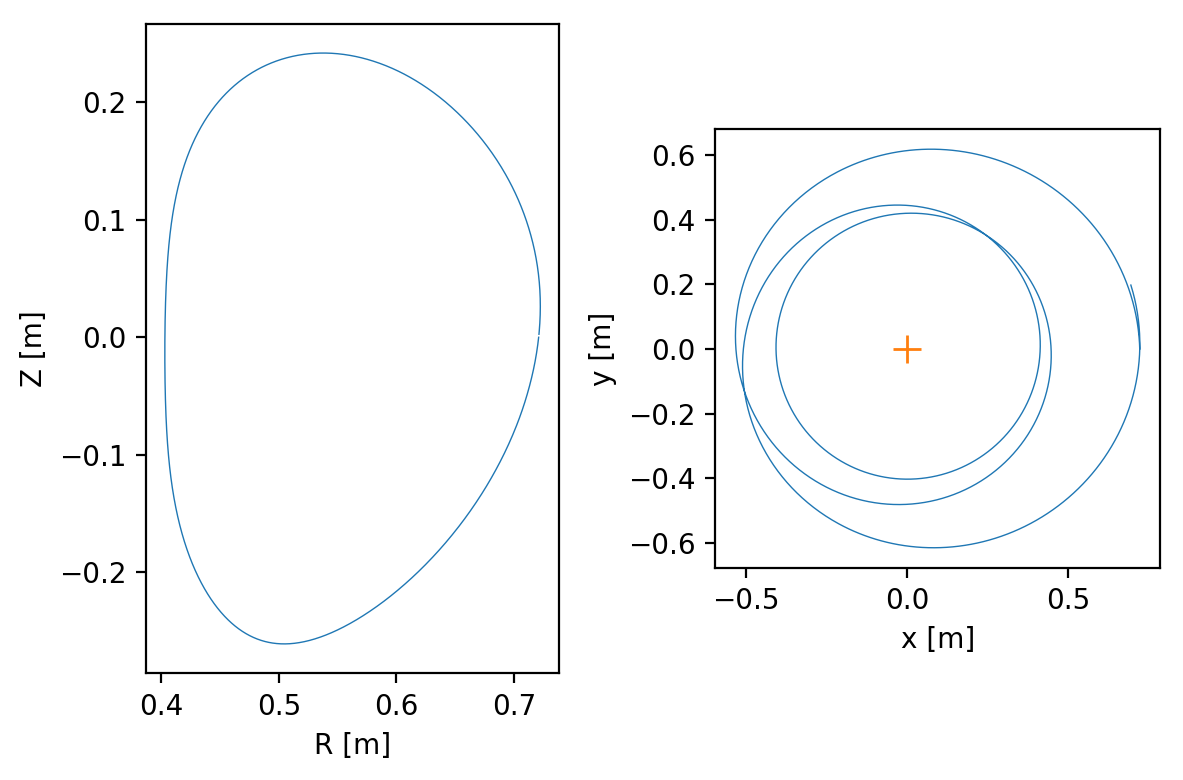

In [211]:
fig, axs = plt.subplots(1, 2)
lkw = dict(lw=0.5)
axs[0].plot(R, Z, **lkw);
axs[0].set_aspect(1)
axs[0].set_ylabel('Z [m]')
axs[0].set_xlabel('R [m]')
axs[1].plot(R*np.cos(phi), R*np.sin(phi), **lkw)
axs[1].set_aspect(1)
axs[1].plot(0, 0, '+', markersize=10)
axs[1].set_ylabel('y [m]')
axs[1].set_xlabel('x [m]')
plt.tight_layout()

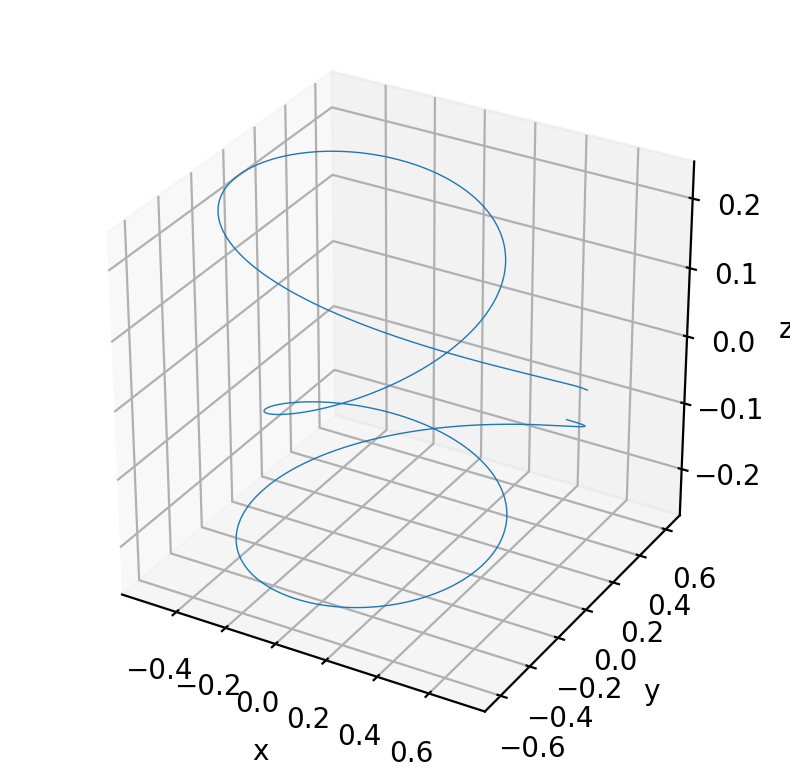

In [212]:
ax = plt.subplot(projection='3d')
ax.plot(R*np.cos(phi), R*np.sin(phi), Z, **lkw)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_aspect(1)
plt.tight_layout()